In [68]:
import utils.dataset as dataset
import utils.helpers as helpers
import implementations

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
TRAIN_DATASET = 'data/train.csv'
TEST_DATA = 'data/test.csv'

# Loading

In [70]:
print("Loading data ..")

# load the train data
Y_train, X_train, indexes = dataset.load_csv_data(TRAIN_DATASET)

# {-1, 1} -> {0l, 1}
Y_train[np.where(Y_train==-1)] = 0.0

print("Load done ..")

Loading data ..
Load done ..


In [71]:
def add_bias_column(X):
    X_temp = np.ones((X.shape[0], X.shape[1]+1))
    X_temp[:,:-1] = X
    X = X_temp
    return X

# Pre-processing

In [72]:
print("Preprocessing train data ..")

ratio_for_splitting = 0.90

# chosen experimenttally
features_to_delete = [14, 17, 18]

# pre process train data
X_train = dataset.delete_features(X_train, features_to_delete)
X_train = dataset.preprocess_dataset(X_train, 10)

# adding bias to X_train data
X_train = add_bias_column(X_train)

# split_data
Y_train, Y_validation, X_train, X_validation = dataset.split_data(Y_train, X_train, ratio_for_splitting)
helpers.set_validation_dataset(X_validation, Y_validation)

print("Preprocess done ..")

Preprocessing train data ..
Preprocess done ..


In [73]:
print("Preprocessing test data ..")

# load test data for predicting Y_data
Y_test, X_test, indexes = dataset.load_csv_data(TEST_DATA)
Y_test[np.where(Y_test==-1)] = 0.0

# pre process test data
X_test = dataset.delete_features(X_test, features_to_delete)
X_test = dataset.preprocess_dataset(X_test, 10)

X_test = add_bias_column(X_test)

print("Preprocess done ..")

Preprocessing test data ..
Preprocess done ..


# Hyperparameter testing

In [ ]:
# put functions to helpers.py

In [213]:
def plot_train_test(train_errors, test_errors, test_range, method_name, testparam):
    plt.figure(figsize=(12,10))
    plt.semilogx(test_range, train_errors, color='b', marker='*', label="Train error")
    plt.semilogx(test_range, test_errors, color='r', marker='*', label="Test error")
    plt.xlabel(testparam,  fontsize=18)
    plt.ylabel("root mean squared error",  fontsize=18)
    plt.title(""+method_name+" - "+testparam+" testing", fontsize=14)
    leg = plt.legend(loc=1, shadow=True, prop={'size': 18})
    leg.draw_frame(False)
    plt.savefig(method_name+"_"+testparam+"_testing")

In [214]:
# defines initial w of size of features
w_initial = np.zeros((X_train.shape[1]), dtype=int)

In [215]:
# method_name   = algorithm
# params        = specific parameters for method
# test_range    = range from to of to_test_param
# to_test_param = the parameter we want to test in the range of test_range
def regression_gamma_testing(y, x, ratio, seed, test_range, method_name, params, to_test_param):
    # define parameter
    test_range = test_range
    
    # split data into test and train
    x_tr, x_te, y_tr, y_te = dataset.split_data(x, y, ratio, seed)
    c = 0
    
    # store train and test err
    err_train = []
    err_test = []
    
    training_tr = implementations.Training(method_name, params)
    training_te = implementations.Training(method_name, params)
    
    for ind, new_param in enumerate(test_range):
        training_tr.params[to_test_param] = new_param
        w_tr, mse_tr = training_tr.fit(x_tr, y_tr)
        
        training_te.params[to_test_param] = new_param  
        w_te, mse_te = training_te.fit(x_te, y_te)
                
        err_train.append(mse_tr)
        err_test.append(mse_te)
        c += 1
        print(c, "proportion={p}, gamma={g:.3f}, Training RMSE={tr:.5f}, Testing RMSE={te:.5f}".format(
               p=ratio, g=new_param, tr=err_train[ind], te=err_test[ind]))
    plot_train_test(err_train, err_test, test_range, method_name, to_test_param)

## Linear regression using gradient descent
### hyperparameter gamma testing

1 proportion=0.9, gamma=0.000, Training RMSE=0.17090, Testing RMSE=0.17209
2 proportion=0.9, gamma=0.000, Training RMSE=0.17073, Testing RMSE=0.17185
3 proportion=0.9, gamma=0.000, Training RMSE=0.17040, Testing RMSE=0.17139
4 proportion=0.9, gamma=0.000, Training RMSE=0.16978, Testing RMSE=0.17053
5 proportion=0.9, gamma=0.000, Training RMSE=0.16865, Testing RMSE=0.16898
6 proportion=0.9, gamma=0.000, Training RMSE=0.16665, Testing RMSE=0.16634
7 proportion=0.9, gamma=0.001, Training RMSE=0.16337, Testing RMSE=0.16220
8 proportion=0.9, gamma=0.001, Training RMSE=0.15847, Testing RMSE=0.15635
9 proportion=0.9, gamma=0.002, Training RMSE=0.15170, Testing RMSE=0.14849
10 proportion=0.9, gamma=0.004, Training RMSE=0.14231, Testing RMSE=0.13768
11 proportion=0.9, gamma=0.007, Training RMSE=0.12942, Testing RMSE=0.12345
12 proportion=0.9, gamma=0.014, Training RMSE=0.11348, Testing RMSE=0.10702
13 proportion=0.9, gamma=0.027, Training RMSE=0.09737, Testing RMSE=0.09262
14 proportion=0.9, ga

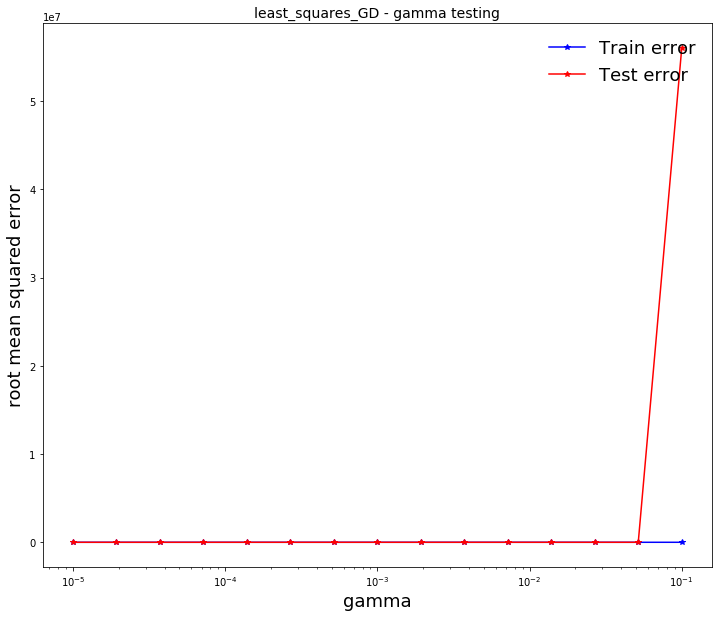

In [216]:
# seed for splitting
seed = 1234
# seed for splitting
split_ratio = ratio_for_splitting
# range of gamma to plot (from, to, iterations)
gamma_range_gd = np.logspace(-5, -1, 15)
# iterations per gamma
iteration_gd = 10
# params for LS-GD
params = {
    'gamma': 0.0005,
    'initial_w': np.zeros(X_train.shape[1]),
    'max_iters': iteration_gd ,
}

regression_gamma_testing(Y_train, X_train, split_ratio, seed, gamma_range_gd, "least_squares_GD", params, "gamma")


## Linear regression using stochastic gradient descent
### hyperparameter gamma testing

1 proportion=0.9, gamma=0.000, Training RMSE=0.17093, Testing RMSE=0.17251
2 proportion=0.9, gamma=0.000, Training RMSE=0.17093, Testing RMSE=0.17251
3 proportion=0.9, gamma=0.000, Training RMSE=0.17092, Testing RMSE=0.17251
4 proportion=0.9, gamma=0.000, Training RMSE=0.17093, Testing RMSE=0.17247
5 proportion=0.9, gamma=0.000, Training RMSE=0.17086, Testing RMSE=0.17243
6 proportion=0.9, gamma=0.000, Training RMSE=0.17084, Testing RMSE=0.17231
7 proportion=0.9, gamma=0.000, Training RMSE=0.17048, Testing RMSE=0.17195
8 proportion=0.9, gamma=0.000, Training RMSE=0.17031, Testing RMSE=0.17167
9 proportion=0.9, gamma=0.000, Training RMSE=0.16889, Testing RMSE=0.17049
10 proportion=0.9, gamma=0.000, Training RMSE=0.16901, Testing RMSE=0.16979
11 proportion=0.9, gamma=0.000, Training RMSE=0.16779, Testing RMSE=0.16727
12 proportion=0.9, gamma=0.000, Training RMSE=0.16521, Testing RMSE=0.16735
13 proportion=0.9, gamma=0.001, Training RMSE=0.16327, Testing RMSE=0.16904
14 proportion=0.9, ga

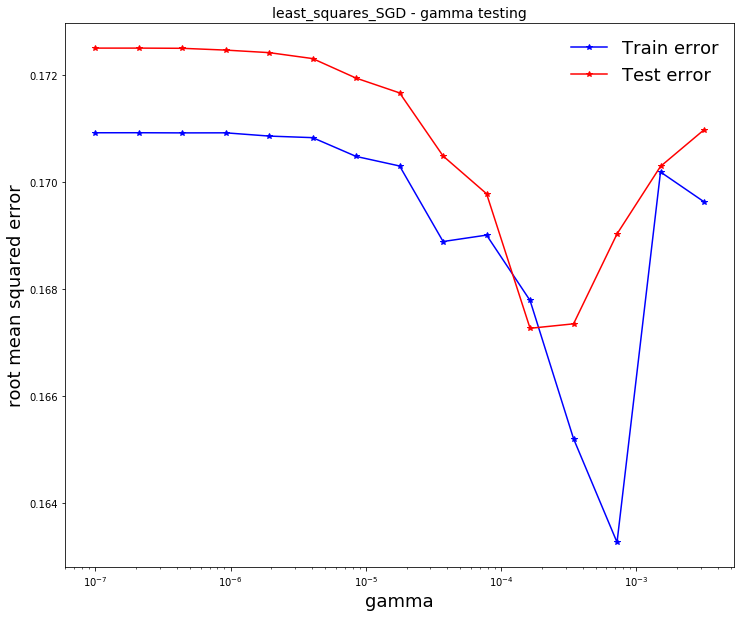

In [217]:
gamma_range_sgd = np.logspace(-7, -2.5, 15)
# iterations per gamma
iteration_sgd = 10
# params for LS-SGD
params = {
    'initial_w': np.zeros(X_train.shape[1]),
    'batch_size': 100000,
    'max_iters': iteration_sgd,
    'gamma': 0.00005,
}

regression_gamma_testing(Y_train, X_train, split_ratio, seed, gamma_range_sgd, "least_squares_SGD", params, "gamma")


## Least squares regression using normal equations


In [218]:
### todo
### todo

## Ridge regression using normal equations
### hyperparameter lambda testing

1 proportion=0.9, gamma=0.000, Training RMSE=0.07004, Testing RMSE=0.06940
2 proportion=0.9, gamma=0.000, Training RMSE=0.07032, Testing RMSE=0.06980
3 proportion=0.9, gamma=0.000, Training RMSE=0.07050, Testing RMSE=0.07010
4 proportion=0.9, gamma=0.000, Training RMSE=0.07071, Testing RMSE=0.07039
5 proportion=0.9, gamma=0.000, Training RMSE=0.07114, Testing RMSE=0.07059
6 proportion=0.9, gamma=0.000, Training RMSE=0.07150, Testing RMSE=0.07125
7 proportion=0.9, gamma=0.000, Training RMSE=0.07246, Testing RMSE=0.07221
8 proportion=0.9, gamma=0.000, Training RMSE=0.07358, Testing RMSE=0.07311
9 proportion=0.9, gamma=0.000, Training RMSE=0.07461, Testing RMSE=0.07444
10 proportion=0.9, gamma=0.000, Training RMSE=0.07566, Testing RMSE=0.07546
11 proportion=0.9, gamma=0.000, Training RMSE=0.07641, Testing RMSE=0.07629
12 proportion=0.9, gamma=0.002, Training RMSE=0.07721, Testing RMSE=0.07726
13 proportion=0.9, gamma=0.013, Training RMSE=0.07884, Testing RMSE=0.07894
14 proportion=0.9, ga

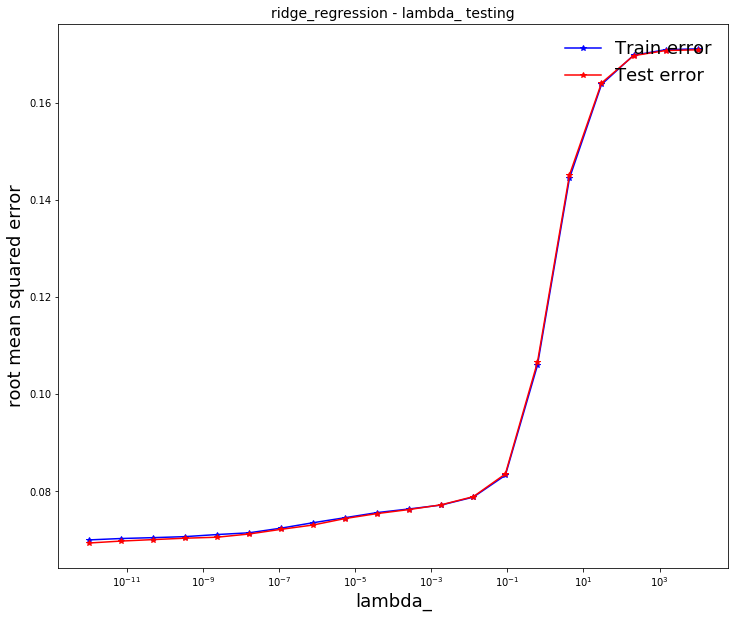

In [219]:
# seed for splitting
seed = 12
# seed for splitting
split_ratio = ratio_for_splitting
# range of lambda to plot (from, to, iterations)
lambdarange = np.logspace(-12, 4, 20)
# params for ridge_regression
params = {
    'lambda_': 0
}

regression_gamma_testing(Y_train, X_train, split_ratio, seed, lambdarange, "ridge_regression", params, "lambda_")


## Logistic regression using gradient descent or SGD
### hyperparameter gamma testing

iter 0 loss 0.6931466802126698
Train accuracy 0.6748049382716049
iter 0 loss 0.6931416276568245
Train accuracy 0.6753333333333333
1 proportion=0.9, gamma=0.000, Training RMSE=0.69314, Testing RMSE=0.69314
iter 0 loss 0.6931357929421452
Train accuracy 0.6750765432098765
iter 0 loss 0.6931221444317941
Train accuracy 0.6753333333333333
2 proportion=0.9, gamma=0.000, Training RMSE=0.69312, Testing RMSE=0.69311
iter 0 loss 0.6931065966385959
Train accuracy 0.6751061728395061
iter 0 loss 0.693069911472583
Train accuracy 0.6756
3 proportion=0.9, gamma=0.000, Training RMSE=0.69307, Testing RMSE=0.69304
iter 0 loss 0.6930283504329973
Train accuracy 0.6751308641975309
iter 0 loss 0.6929300349658057
Train accuracy 0.6756888888888889
4 proportion=0.9, gamma=0.000, Training RMSE=0.69294, Testing RMSE=0.69284
iter 0 loss 0.6928190038402532
Train accuracy 0.6751654320987655
iter 0 loss 0.6925565700164976
Train accuracy 0.6757333333333333
5 proportion=0.9, gamma=0.000, Training RMSE=0.69259, Testing R

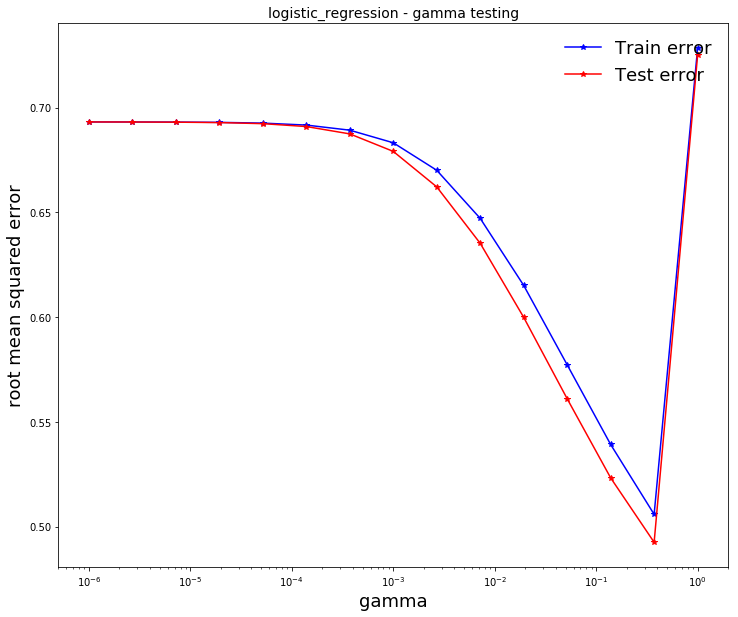

In [220]:
# Gamma testing
gamma_range_reglog_gamma = np.logspace(-6, 0, 15)
# iterations per gamma
iteration_log = 10
# params for logistic_regression
params = {
    'lambda_': 0.0005,
    'initial_w': np.zeros(X_train.shape[1]),
    'max_iters': iteration_log ,
    'gamma': 0.01 ,
}

regression_gamma_testing(Y_train, X_train, split_ratio, seed, gamma_range_reglog_gamma, "logistic_regression", params, "gamma")


## Regularized logistic regression using gradient descent or SGD
### hyperparameter gamma testing

1 proportion=0.9, gamma=0.000, Training RMSE=0.69310, Testing RMSE=0.69305
2 proportion=0.9, gamma=0.000, Training RMSE=0.69296, Testing RMSE=0.69286
3 proportion=0.9, gamma=0.000, Training RMSE=0.69270, Testing RMSE=0.69253
4 proportion=0.9, gamma=0.000, Training RMSE=0.69223, Testing RMSE=0.69193
5 proportion=0.9, gamma=0.000, Training RMSE=0.69138, Testing RMSE=0.69084
6 proportion=0.9, gamma=0.000, Training RMSE=0.68985, Testing RMSE=0.68890
7 proportion=0.9, gamma=0.000, Training RMSE=0.68717, Testing RMSE=0.68552
8 proportion=0.9, gamma=0.001, Training RMSE=0.68260, Testing RMSE=0.67988
9 proportion=0.9, gamma=0.001, Training RMSE=0.67523, Testing RMSE=0.67104
10 proportion=0.9, gamma=0.002, Training RMSE=0.66425, Testing RMSE=0.65840
11 proportion=0.9, gamma=0.004, Training RMSE=0.64945, Testing RMSE=0.64202
12 proportion=0.9, gamma=0.008, Training RMSE=0.63120, Testing RMSE=0.62232
13 proportion=0.9, gamma=0.014, Training RMSE=0.60989, Testing RMSE=0.59977
14 proportion=0.9, ga

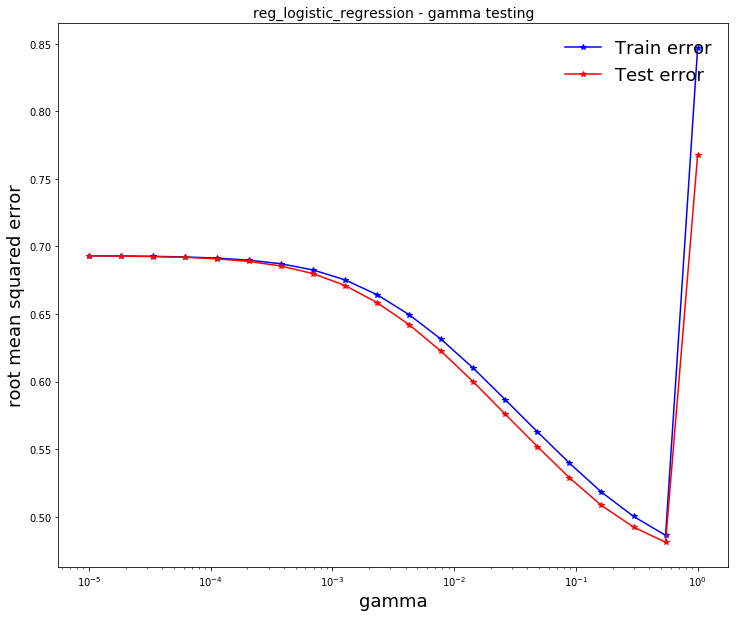

In [221]:
# Gamma testing
gamma_range_reglog_gamma = np.logspace(-5, 0, 20)
# lambda
lambda_ = 0.0005
# iterations per gamma
iteration_reglog = 10
# params for reg_logistic_regression
params = {
    'lambda_': lambda_,
    'initial_w': np.zeros(X_train.shape[1]),
    'max_iters': iteration_reglog ,
    'gamma': 0.01 ,
}

regression_gamma_testing(Y_train, X_train, split_ratio, seed, gamma_range_reglog_gamma, "reg_logistic_regression", params, "gamma")


### hyperparameter lambda testing

In [ ]:
# Lambda testing
gamma_range_reglog_lambda = np.logspace(-6, 5, 20)
# params for reg_logistic_regression
gamma = 0.01
params = {
    'lambda_': 0.0005,
    'initial_w': np.zeros(X_train.shape[1]),
    'max_iters': iteration_reglog ,
    'gamma': gamma ,
}

regression_gamma_testing(Y_train, X_train, split_ratio, seed, gamma_range_reglog_lambda, "reg_logistic_regression", params, "lambda_")
